In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("WineQT.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [11]:
df.isnull().sum().sum()

0

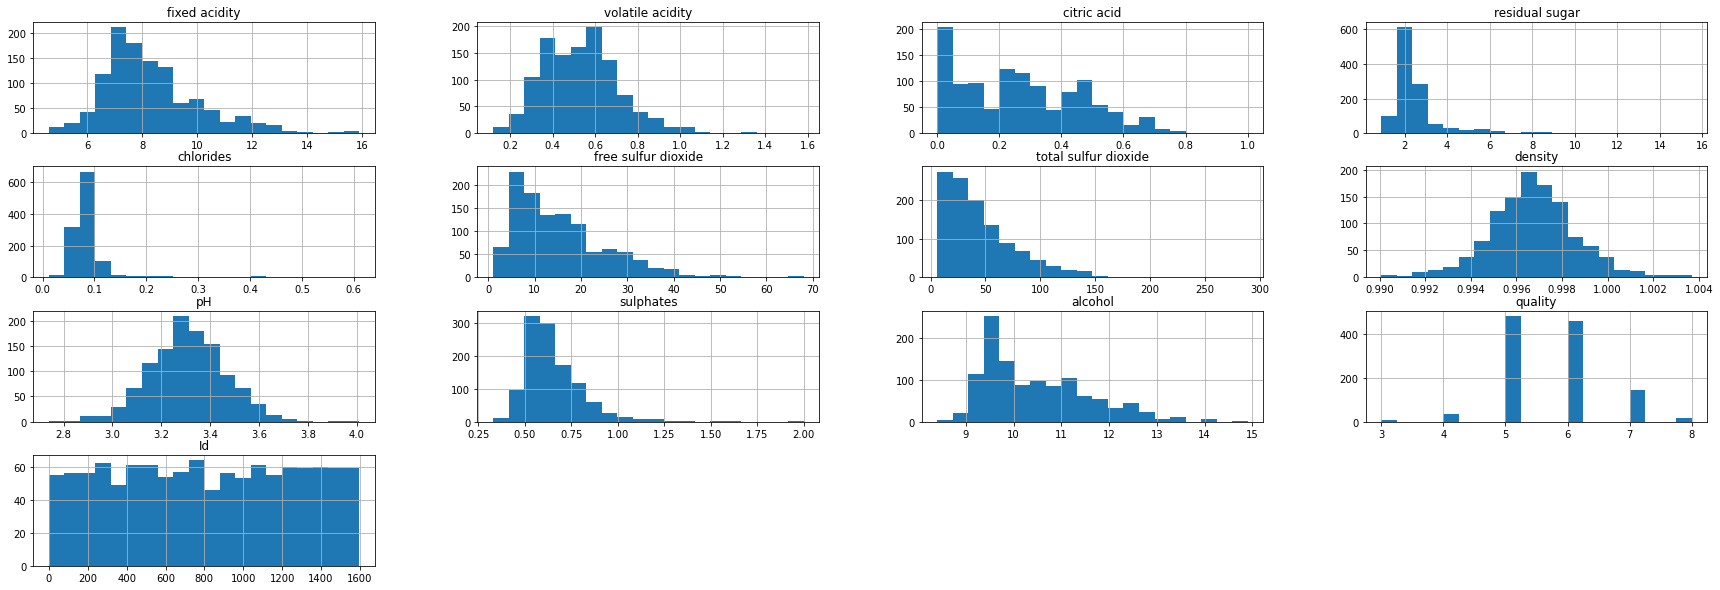

In [18]:
df.hist(bins=20, figsize=(30, 10))
plt.show()

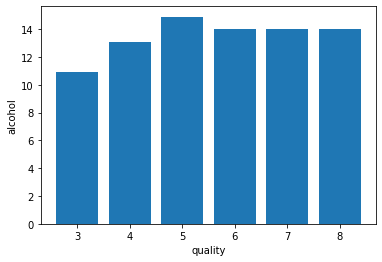

In [19]:
plt.bar(df["quality"],df["alcohol"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

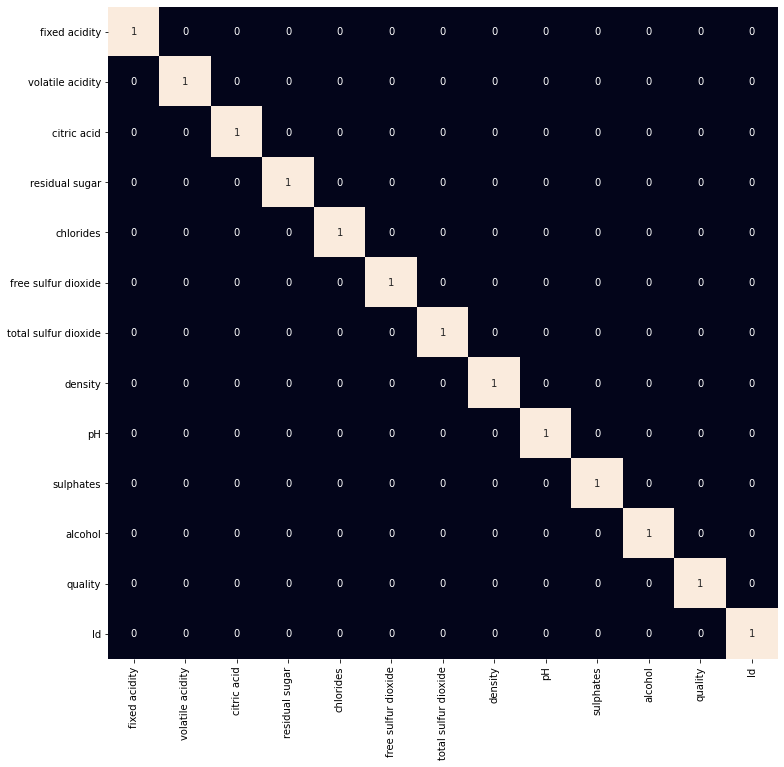

In [29]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass
plt.figure(figsize=(12,12))
sb.heatmap(df.corr()>.7, annot=True, cbar=False)
plt.show()

In [30]:
df = df.drop('total sulfur dioxide', axis=1)

 Model Training

In [33]:
df["best quality"] = [1 if x>5 else 0 for x in df.quality]


In [34]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [39]:
features = df.drop(['quality', 'best quality'], axis=1)


In [47]:
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

from sklearn.impute  import SimpleImputer
imputer = SimpleImputer(strategy="mean")
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

xtrain.shape, xtest.shape
xtrain,xtest

(array([[9.000e+00, 3.600e-01, 5.200e-01, ..., 6.200e-01, 1.130e+01,
         9.560e+02],
        [8.600e+00, 4.700e-01, 2.700e-01, ..., 8.000e-01, 1.120e+01,
         9.240e+02],
        [7.700e+00, 5.700e-01, 2.100e-01, ..., 5.400e-01, 9.800e+00,
         1.197e+03],
        ...,
        [8.200e+00, 1.000e+00, 9.000e-02, ..., 5.500e-01, 9.000e+00,
         2.340e+02],
        [7.300e+00, 6.500e-01, 0.000e+00, ..., 4.700e-01, 1.000e+01,
         7.000e+00],
        [8.400e+00, 6.500e-01, 6.000e-01, ..., 5.200e-01, 9.200e+00,
         3.040e+02]]),
 array([[7.200e+00, 5.700e-01, 6.000e-02, ..., 7.000e-01, 9.600e+00,
         6.620e+02],
        [1.150e+01, 1.800e-01, 5.100e-01, ..., 9.700e-01, 1.010e+01,
         2.690e+02],
        [6.500e+00, 9.000e-01, 0.000e+00, ..., 6.300e-01, 1.090e+01,
         1.455e+03],
        ...,
        [8.300e+00, 6.500e-01, 1.000e-01, ..., 5.500e-01, 9.500e+00,
         7.530e+02],
        [7.300e+00, 4.800e-01, 3.200e-01, ..., 6.500e-01, 1.000e+01,
   

In [50]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [51]:
model = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(3):
    model[i].fit(xtrain,ytrain)
    print(f'{model[i]} : ')
    print('Training Accuracy : ',metrics.roc_auc_score(ytrain,model[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, model[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7546950559364851
Validation Accuracy :  0.7255154639175256

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7867463292721023

SVC() : 
Training Accuracy :  0.7648213641284736
Validation Accuracy :

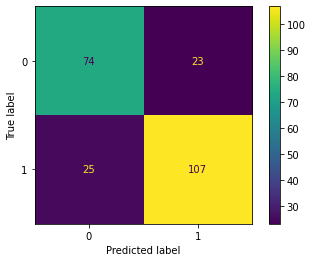

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(ytest, model[1].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model[1].classes_) 
disp.plot()
plt.show()

In [53]:
print(metrics.classification_report(ytest,model[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        97
           1       0.82      0.81      0.82       132

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229

